In [1]:
from models.SklearnClassifier import SklearnClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from pprint import pprint
import utils
import time
from Embeddings import Embeddings

In [2]:
# Create the embeddings object
embeddings = Embeddings('../data/doc2vec.npy', '../data/bert.npy', '../data/authors.npy', '../data/authors_encoded.npy', '../pickles/author_encoder.pkl')

In [3]:
def run_logistic_regression(X, y, figure_title, scale_features=True):
    if scale_features:
        X = utils.scale_feature_matrix(X)
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Oversample the train data
    X_train, y_train = utils.over_sample(X_train, y_train)
    
    # Find the best hyperparameters
    params = {
        'C': [0.001, 0.01, 0.1, 1, 10, 100]
    }
    
    clf = SklearnClassifier(LogisticRegression(max_iter=10000, n_jobs=-1))
    # Find the best hyperparameters
    start = time.time()
    clf.hyperparameter_tuning(X_train, y_train, params)
    print('Hyperparameter tuning and training time: ', time.time() - start)
    # Print the best hyperparameters
    print('Best hyperparameters: ', clf.get_best_hyperparams())
    
    # Evaluate the model
    pprint(clf.evaluate(X_test, y_test))
    
    # Get the confusion matrix
    clf.get_confusion_matrix(X_test, y_test, figure_title)

In [4]:
# Load the feature matrix and labels for doc2vec
X = embeddings.get_doc2vec()
y = embeddings.get_labels()

Fitting 5 folds for each of 6 candidates, totalling 30 fits


/home/pogrebitskiy.d/miniconda3/lib/python3.12/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


[CV] END ............................................C=0.001; total time=  11.3s
[CV] END ............................................C=0.001; total time=  13.7s
[CV] END .............................................C=0.01; total time=  15.6s
[CV] END ............................................C=0.001; total time=  18.3s
[CV] END ............................................C=0.001; total time=  18.3s
[CV] END .............................................C=0.01; total time=  19.2s
[CV] END ............................................C=0.001; total time=  19.7s
[CV] END .............................................C=0.01; total time=  23.8s
[CV] END .............................................C=0.01; total time=  26.1s
[CV] END ..............................................C=0.1; total time=  31.2s
[CV] END .............................................C=0.01; total time=  30.9s
[CV] END ..............................................C=0.1; total time=  33.0s
[CV] END ...................

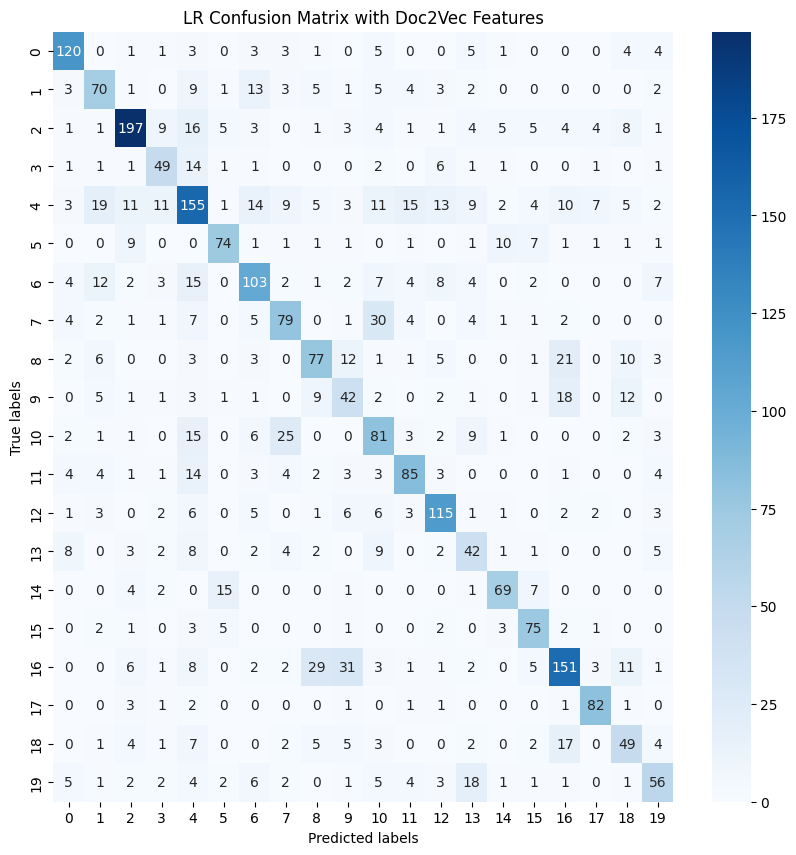

In [5]:
# Run logistic regression with doc2vec features
run_logistic_regression(X, y, 'LR Confusion Matrix with Doc2Vec Features', scale_features=True)

In [6]:
# Load the BERT feature matrix and labels
X = embeddings.get_bert()
y = embeddings.get_labels()

Fitting 5 folds for each of 6 candidates, totalling 30 fits


/home/pogrebitskiy.d/miniconda3/lib/python3.12/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


[CV] END ................................................C=1; total time= 1.7min
[CV] END ............................................C=0.001; total time=  10.1s
[CV] END ............................................C=0.001; total time=  16.9s
[CV] END ............................................C=0.001; total time=  19.1s
[CV] END ............................................C=0.001; total time=  26.7s
[CV] END ............................................C=0.001; total time=  30.9s
[CV] END .............................................C=0.01; total time=  58.5s
[CV] END .............................................C=0.01; total time= 1.1min
[CV] END .............................................C=0.01; total time= 1.2min
[CV] END ..............................................C=0.1; total time= 1.5min
[CV] END ..............................................C=0.1; total time= 1.6min
[CV] END .............................................C=0.01; total time= 1.8min
[CV] END ...................

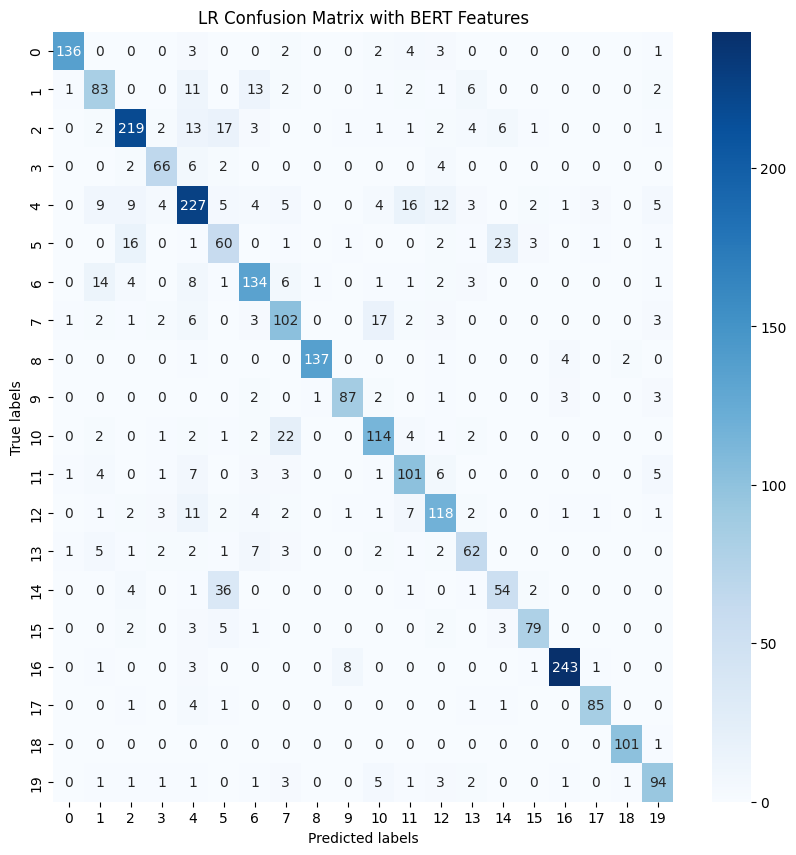

In [7]:
# Run logistic regression with BERT features, no need to scale features with BERT
run_logistic_regression(X, y, 'LR Confusion Matrix with BERT Features', scale_features=False)